# Understand the conceptual model

In [7]:
# Import the pyKasso and numpy packages
import pykasso as pk
from pykasso.model.fracturation import Fractures
import numpy as np
from matplotlib.colors import ListedColormap

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0,
    'y0': 0,
    'z0': 0,
    'nx': 100,
    'ny': 100,
    'nz': 30,
    'dx': 10,
    'dy': 10,
    'dz': 10,
}

# Declare the project parameters
app.new_project(name='conceptual_model', grid_parameters=grid_parameters)
nx, ny, nz = app.project.grid.shape
app.visualizer.notebook = True

In [8]:
# Figures parameters
cpos = (1, 1, 1)
grid_origin = (0, 0, 0)
grid_spacing = (10, 10, 10)
# background_color = '#cccccc'
background_color = 'white'
show_grid = False
show_scalar_bar = False
show_outline = True
savefig = True
filenames = {
    'geology'           : 'img\cp_geology.png',
    'faults'            : 'img\cp_faults.png',
    'fractures'         : 'img\cp_fractures.png',
    'conceptual_model'  : 'img\cp_conceptual_model.png',
}

# Font parameters
font_size = 24

# Custom cmap
codes = '665454-c3b299-04724d-6b7fd7-ff1b1c'.split('-')
codes = ['#' + code for code in codes]
c1, c2, c3, c4, c5 = codes
cmap_geology = [c5, c4, c2]
cmap_faults = [c1]
cmap_fractures = [c3]
cmap_cp = cmap_geology + cmap_faults + cmap_fractures

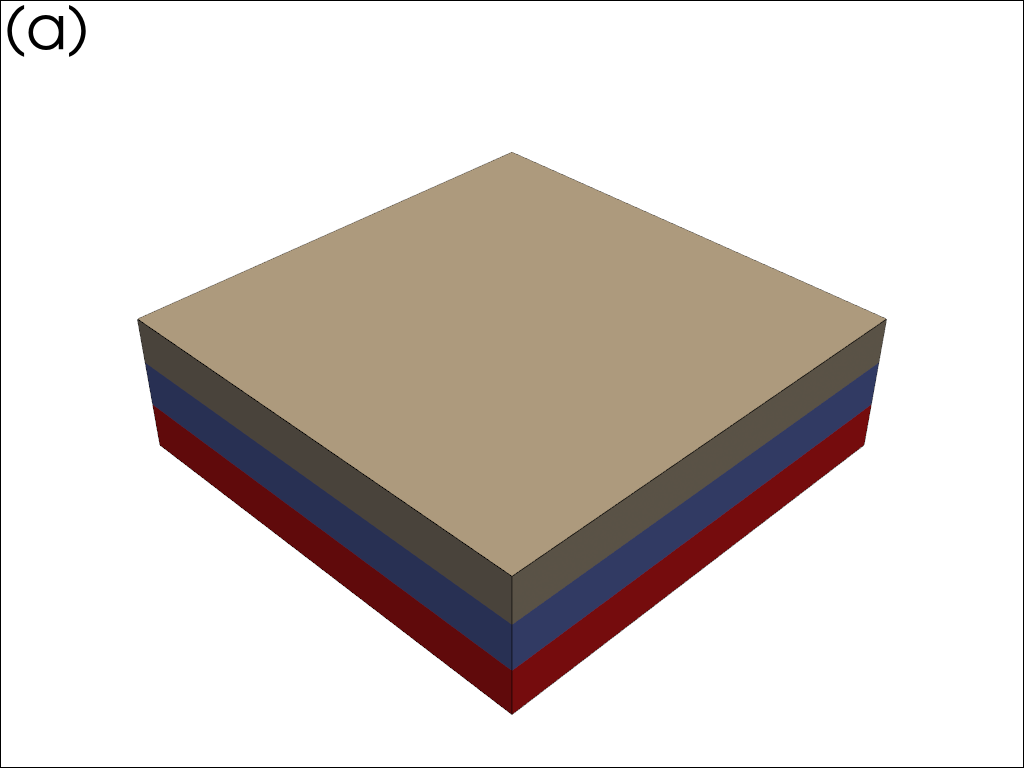

In [9]:
# Construct the geology model
geology = np.ones((nx, ny, nz))
geology[:,:, 10:20] = 2
geology[:,:, 20:30] = 3

settings = {
    'cmap'             : cmap_geology,
    'text_options'     : {'text': '(a)', 'font_size': font_size},
    'show_grid'        : show_grid,
    'show_outline'     : show_outline,
    'show_scalar_bar'  : show_scalar_bar,
    'background_color' : background_color,
}

app.visualizer.pv_plot_array(array=geology,
                             settings=settings,
                             grid_origin=grid_origin,
                             grid_spacing=grid_spacing,
                             cpos=cpos, 
                             savefig=savefig,
                             filename=filenames['geology'],
                             )

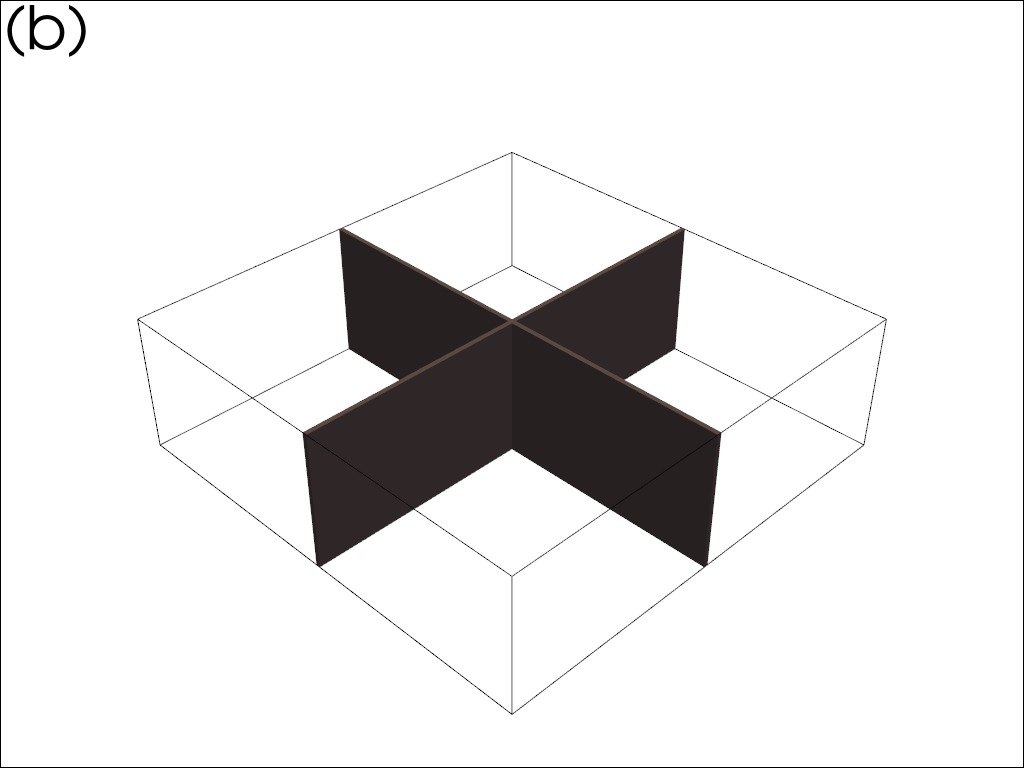

In [10]:
# Construct the faults model
faults = np.zeros_like(geology)
faults[int(nx/2), 0:ny, :] = 4
faults[0:nx, int(ny/2), :] = 4

settings = {
    'cmap'             : cmap_faults,
    'mask_values'      : [0],
    'text_options'     : {'text': '(b)', 'font_size': font_size},
    'show_grid'        : show_grid,
    'show_outline'     : show_outline,
    'show_scalar_bar'  : show_scalar_bar,
    'background_color' : background_color,
}

app.visualizer.pv_plot_array(array=faults,
                             settings=settings,
                             grid_origin=grid_origin,
                             grid_spacing=grid_spacing,
                             cpos=cpos,
                             savefig=savefig,
                             filename=filenames['faults'],
                             )

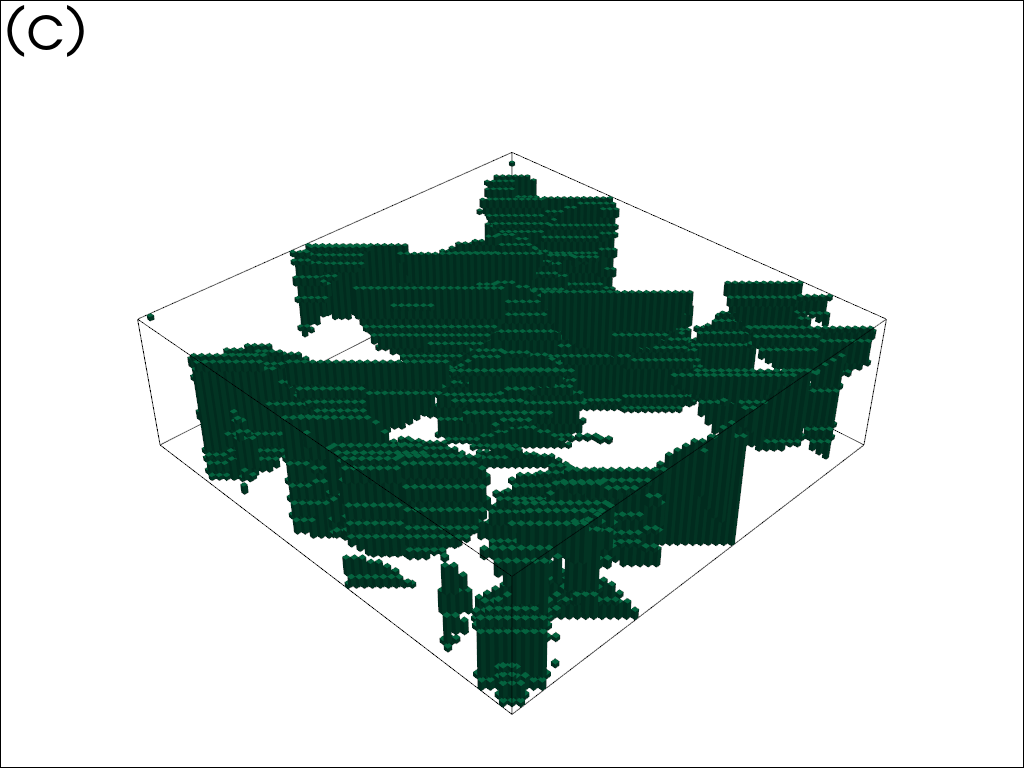

In [11]:
# Construct the fracturation model
RNG = np.random.default_rng(seed=0)
fractures = Fractures(app.project.grid, RNG)
frac_settings_01 = {
    'density'      : 0.00005,
    'orientation'  : 135,
    'dip'          : 90,
    'length'       : 300,
    'alpha'        : 2,
}
fractures.generate_fracture_family('family_01', frac_settings_01)
fractures.compute_model()
fracs = fractures.data_volume * 5

settings = {
    'cmap'             : cmap_fractures,
    'mask_values'      : [0],
    'text_options'     : {'text': '(c)', 'font_size': font_size},
    'show_grid'        : show_grid,
    'show_outline'     : show_outline,
    'show_scalar_bar'  : show_scalar_bar,
    'background_color' : background_color,
}

app.visualizer.pv_plot_array(array=fracs,
                             settings=settings,
                             grid_origin=grid_origin,
                             grid_spacing=grid_spacing,
                             cpos=cpos,
                             savefig=savefig,
                             filename=filenames['fractures'],
                             )

## Construct the conceptual model

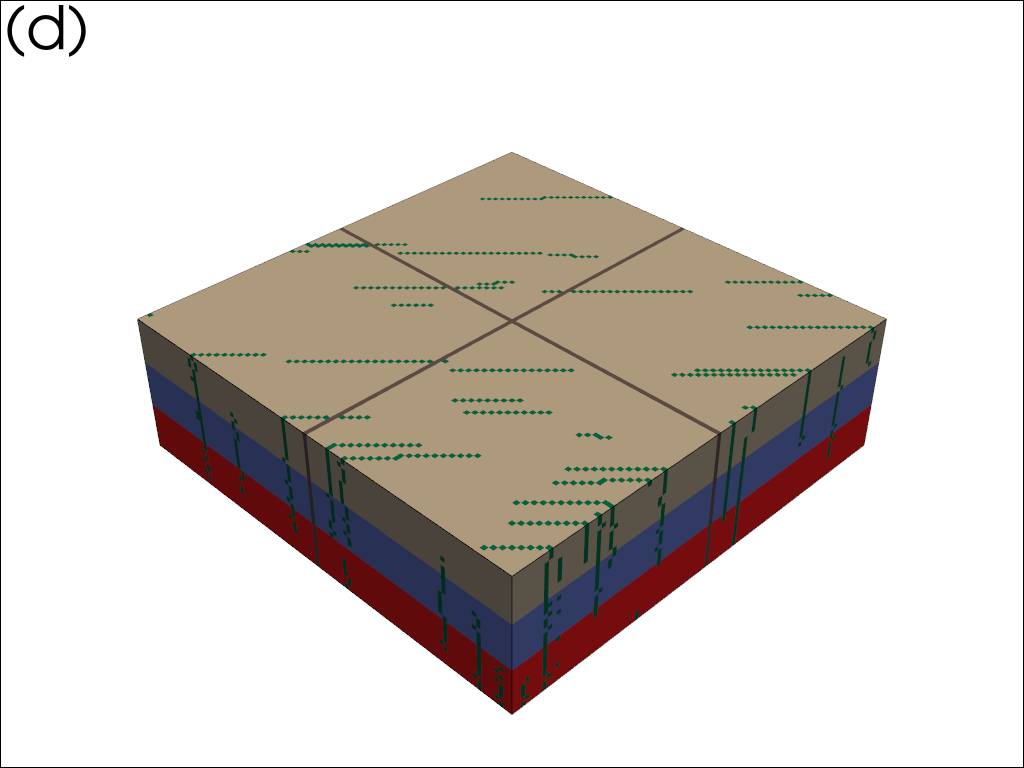

In [12]:
# Add geology
conceptual_model = geology.copy()
# Add fractures
conceptual_model = np.where(fracs > 0, fracs, conceptual_model)
# Add faults
conceptual_model = np.where(faults > 0, faults, conceptual_model)

settings = {
    'cmap'             : cmap_cp,
    'mask_values'      : [0],
    'text_options'     : {'text': '(d)', 'font_size': font_size},
    'show_grid'        : show_grid,
    'show_outline'     : show_outline,
    'show_scalar_bar'  : show_scalar_bar,
    'background_color' : background_color,
}

app.visualizer.pv_plot_array(array=conceptual_model,
                             settings=settings,
                             grid_origin=grid_origin,
                             grid_spacing=grid_spacing,
                             cpos=cpos,
                             savefig=savefig,
                             filename=filenames['conceptual_model'],
                             )